In [1]:
import pandas as pd
import numpy as np
import pyreadstat
# Load the .dta file
pd.set_option('display.float_format', '{:.0f}'.format)



In [2]:
df_iv = pd.read_stata('data/school_final- tashih shodeh -4.dta')
# Load the .dta file using pandas

# Convert the pandas DataFrame to .sav format
pyreadstat.write_sav(df_iv, 'caspian4-ghorbani.sav')


In [3]:
import pyreadstat

# Read the .dta file using pyreadstat
df_iv, meta = pyreadstat.read_dta('data/last-caspian-v-9.dta')

# You can access the value labels from the meta object, for example:
value_labels = meta.value_labels

## Apply the value labels to the corresponding columns in the DataFrame
for column, labels in value_labels.items():
    if column in df_iv.columns:
        # Map the values to their corresponding labels
        df_iv[column] = df_iv[column].map(labels)

# Now, write the dataframe to a .sav file
pyreadstat.write_sav(df_iv, 'caspian5-ghorbani.sav')


In [4]:
df_iv = pd.read_spss('caspian4-ghorbani.sav')
df_v = pd.read_spss('caspian5-ghorbani.sav')


In [45]:
print('casp4: ',df_iv.shape)
print('casp5: ',df_v.shape)


casp4:  (13542, 342)
casp5:  (14286, 542)


In [5]:
def rename_features(df1, caspian_number):
    df2 = df1.copy()
    # Rename the features in the dataframe
    if caspian_number == 5:
        df2.rename(columns={'weight_1': 'weight', 'height_2': 'height', 'universi': 'university','ap_9':'schoolType','waist_3':'waist','wrist4':'wrist'}, inplace=True)

    elif caspian_number == 4:
        df2.rename(columns={'weight_1': 'weight', 'height_2': 'height', 'universi': 'university','waist_3':'waist','hip_4':'hip','wrist_5':'wrist'}, inplace=True)        
    return df2

df_iv = rename_features(df_iv,4)
df_v = rename_features(df_v,5)



In [6]:
df_v.rename(columns={'ap_3':'fathereducation6halati'},inplace=True)
df_v.rename(columns={'ap_4':'mothereducation6halati'},inplace=True)
df_iv.rename(columns={'v124_a':'ap_2'},inplace=True)
df_iv.rename(columns={'code':'id2'},inplace=True)


In [7]:
df_dict = {'caspian_IV_ghorbani':df_iv, 'caspian_V_ghorbani': df_v}

def preprocess(dataframes_dict):
    processed_dfs = {}  # Dictionary to store processed DataFrames
    for name, df_org in dataframes_dict.items():
        df = df_org.copy()

        # Filter age
        df = df[(df["age"] >= 7) & (df["age"] <= 18)]
        # please change the type of heught_1 and weight_1 in caspian4 to numeric if you can't do it directly uncomment two line below
        df['height'] = pd.to_numeric(df['height'], errors='coerce')
        df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
        df["bmi1"] = df["weight"] / ((df["height"] / 100) ** 2)
        
        # Remove null tuples
        records_with_nulls = df[
            df[["weight", "height", "sex", "age"]].isna().any(axis=1)
        ]
        df = df.dropna(subset=["height", "weight", "sex"])
        print(
            f"Number of records with NaN value in weight or height in {name}: {len(records_with_nulls)}"
        )

        # Store the processed DataFrame in the new dictionary
        processed_dfs[name] = df

    return processed_dfs


# Usage
processed_dfs = preprocess(df_dict)

Number of records with NaN value in weight or height in caspian_IV_ghorbani: 110
Number of records with NaN value in weight or height in caspian_V_ghorbani: 128


In [49]:
df_iv.a_4.unique()

array(['5 ya 6 ruz dar hafte', '1 ya 2ruz dar hafte',
       '3 ya 4 ruz dar hafte', 'benodrat ya hargez', ''], dtype=object)

In [50]:
df_v.a_4.unique()

array(['never', '1 or 2 in week', '3 or 4 in week', '5 or 6 in week',
       'everyday', ''], dtype=object)

In [8]:
df_iv.fathereducation6halati.unique()

array(['ebtedaei', 'bisavad', 'rahnamaei', 'balaye lisans', 'diplom',
       'lisans', '', 'savad qorani'], dtype=object)

In [52]:
df_iv.mothereducation6halati.unique()

array(['diplom', 'bisavad', 'rahnamaei', 'lisans', 'ebtedaei', '',
       'savad qorani', 'balaye lisans'], dtype=object)

In [9]:
provinces_mapping = {
    'caspian4':{
    "khozestan": "Khuzestan",
    "boshehr": "Bushehr",
    "ardabil": "Ardabil",
    "azar garbi": "West Azerbaijan",
    "khorasshomali": "North Khorasan",
    "qazvin": "Qazvin",
    "lorestan": "Lorestan",
    "khorasrazavi": "Khorasan Razavi",
    "kordestan": "Kurdistan",
    "yazd": "Yazd",
    "kerman": "Kerman",
    "kermanshah": "Kermanshah",
    "isfahan": "Isfahan",
    "markazi": "Markazi",
    "tehran": "Tehran",
    "sistan": "Sistan and Baluchestan",
    "ilam": "Ilam",
    "kohkiloye": "Kohgiluyeh and Boyer-Ahmad",
    "4 mahal bakhtiyari": "Chaharmahal and Bakhtiari",
    "hormzgan": "Hormozgan",
    "semnan": "Semnan",
    "golestan": "Golestan",
    "mazandaran": "Mazandaran",
    "hamadan": "Hamedan",
    "alborz": "Alborz",
    "azar shargi": "East Azerbaijan",
    "zanjan": "Zanjan",
    "fars": "Fars",
    "gilan": "Gilan",
    "qom": "Qom",
    "":  np.nan  # Empty entry
    },
    'caspian5':
    {
    "khorasan razavi": "Khorasan Razavi",
    "iranshahr": "Sistan and Baluchestan",
    "ilam": "Ilam",
    "khorasan shomali": "North Khorasan",
    "charmahal": "Chaharmahal and Bakhtiari",
    "kermanshah": "Kermanshah",
    "gilan": "Gilan",
    "mazandaran": "Mazandaran",
    "shahrood": "Semnan",
    "lorestan": "Lorestan",
    "qazvin": "Qazvin",
    "abadan": "Khuzestan",
    "ardebil": "Ardabil",
    "zanjan": "Zanjan",
    "kohkiloyeh": "Kohgiluyeh and Boyer-Ahmad",
    "khorasan jonobi": "South Khorasan",
    "khozestan": "Khuzestan",
    "isfahan": "Isfahan",
    "azar gharbi": "West Azerbaijan",
    "kurdestan": "Kurdistan",
    "hormozgan": "Hormozgan",
    "semnan": "Semnan",
    "fars": "Fars",
    "golestan": "Golestan",
    "alborz": "Alborz",
    "kerman": "Kerman",
    "yazd": "Yazd",
    "arak": "Markazi",
    "hamedan": "Hamedan",
    "behbahan": "Khuzestan",
    "boshehr": "Bushehr",
    "saveh": "Markazi",
    "rafsanjan": "Kerman",
    "shahidbeheshti": "Tehran",
    "tabriz": "East Azerbaijan",
    "esfarayen": "North Khorasan",
    "tehran": "Tehran",
    "iran": "Tehran",
    "sistan": "Sistan and Baluchestan",
    "dezful": "Khuzestan",
    "kerman.jiroft": "Kerman",
    "fasad": "Fars",
    "shoshtar": "Khuzestan",
    "sabzevar": "Khorasan Razavi",
    "torbat heidariyeh": "Khorasan Razavi",
    "zabol": "Sistan and Baluchestan",
    "babol": "Mazandaran",
    "bam": "Kerman",
    "neishabor": "Khorasan Razavi",
    "larestan": "Fars",
    "torbat jam": "Khorasan Razavi",
    "kashan": "Isfahan",
    "jahrom": "Fars",
    "":  np.nan  # Empty entry
    }
}


In [10]:
university_to_province = provinces_mapping.get('caspian4')
processed_dfs['caspian_IV_ghorbani']['province'] = processed_dfs['caspian_IV_ghorbani']['province'].replace(university_to_province)

In [11]:
university_to_province = provinces_mapping.get('caspian5')
processed_dfs['caspian_V_ghorbani']['province'] = processed_dfs['caspian_V_ghorbani']['university'].replace(university_to_province)

In [56]:
processed_dfs['caspian_V_ghorbani'].province.unique()

array(['Khorasan Razavi', 'Sistan and Baluchestan', 'Ilam',
       'North Khorasan', 'Chaharmahal and Bakhtiari', 'Kermanshah',
       'Gilan', 'Mazandaran', 'Semnan', 'Lorestan', 'Qazvin', 'Khuzestan',
       'Ardabil', 'Zanjan', 'Kohgiluyeh and Boyer-Ahmad',
       'South Khorasan', 'Isfahan', 'West Azerbaijan', 'Kurdistan',
       'Hormozgan', 'Fars', 'Golestan', 'Alborz', 'Kerman', 'Yazd',
       'Markazi', 'Hamedan', 'Bushehr', 'Tehran', 'East Azerbaijan'],
      dtype=object)

In [12]:
education_mapping = {
    "ebtedaei": "primary",
    "bisavad": "illiterate",
    "rahnamaei": "intermediate",
    "balaye lisans": "upper than bachelor",
    "diplom": "diplome",
    "lisans": "bachelor",
    "": "",  # Empty entry remains empty
    "savad qorani": "quranic literacy"
    
}

In [13]:
processed_dfs['caspian_IV_ghorbani']['fathereducation6halati'] = processed_dfs['caspian_IV_ghorbani']['fathereducation6halati'].apply(lambda x: education_mapping.get(x, ''))
processed_dfs['caspian_IV_ghorbani']['mothereducation6halati'] = processed_dfs['caspian_IV_ghorbani']['mothereducation6halati'].apply(lambda x: education_mapping.get(x, ''))


In [26]:
df1 = processed_dfs['caspian_IV_ghorbani']
df2 = processed_dfs['caspian_V_ghorbani']

In [35]:

#  feature columns to match on
matching_features = ['province','region','age','height','weight','birth_ye']
# Merge the datasets on matching features
merged_df = pd.merge(df1, df2, on=matching_features, suffixes=('_df1', '_df2'))

# Group by 'id2' from df2 and collect 'id2' values from df1
result = merged_df.groupby('id2_df2')['id2_df1'].apply(list).reset_index()

# Rename columns for clarity
result.columns = ['record_id2_df2', 'records_id2_df1']


# Step 1: Flatten the list of `id2` values from `records_id2_df1`
id2_to_remove = set([item for sublist in result['records_id2_df1'] for item in sublist])

# Step 2: Filter `caspian_IV` to exclude these `id2` values
df_filtered = df1[~df1['id2'].isin(id2_to_remove)]

# Display the filtered DataFrame
print(df_filtered.info())





<class 'pandas.core.frame.DataFrame'>
Index: 13089 entries, 0 to 13536
Columns: 343 entries, source to bmi1
dtypes: float64(54), object(289)
memory usage: 34.4+ MB
None


In [36]:
len(id2_to_remove)

0

In [ ]:
common_cols = ['province','age','height','region','fathereducation6halati','mothereducation6halati','birth_ye']
common_cols

['province',
 'age',
 'height',
 'region',
 'fathereducation6halati',
 'mothereducation6halati']

In [ ]:

# Step 2: Iterate and compare
results = []

for i, row1 in df1.iterrows():
    # Select the relevant columns for comparison
    row1_values = row1[common_cols]
    for j, row2 in df2.iterrows():
        row2_values = row2[common_cols]
        # Compare row1 values with row2 values
        is_equal = row1_values.equals(row2_values)
        results.append({
            'df1_row': row1['id2'],  # Use id1 from df1
            'df2_row': row2['id2'],  # Use id2 from df2
            'is_equal': is_equal
        })
# Convert results to a DataFrame for easier analysis
comparison_df = pd.DataFrame(results)
print(comparison_df)

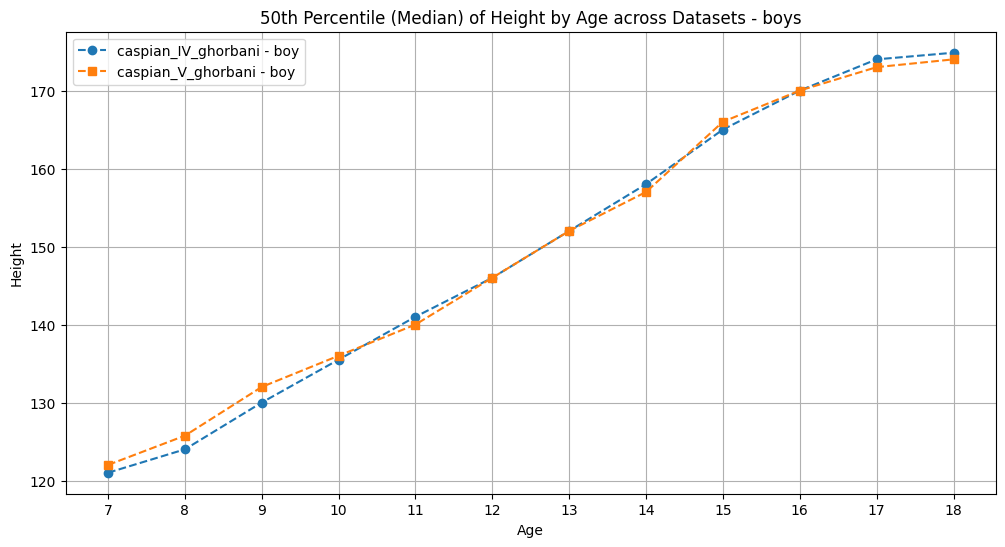

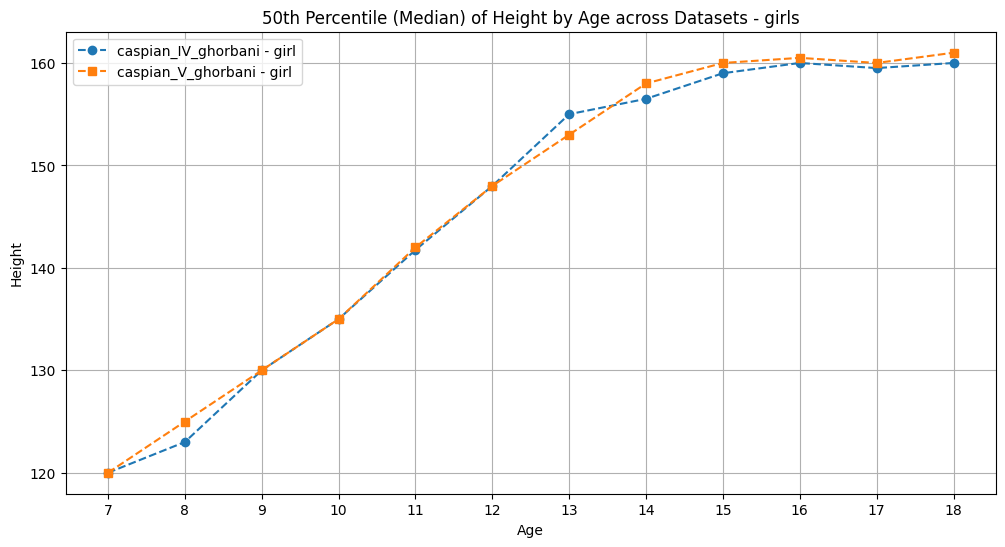

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import itertools

# List of markers to cycle through
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', '+', 'x']  # Add more markers if needed

# Initialize a dictionary to store median (50th percentile) data for each dataset
median_data = {}
frac = 0.3
feature = 'height'  # Change this to 'weight' or 'bmi1' if needed
percentile = 50  # 50th percentile

# Loop through each dataset in processed_dfs
for df_name, df in processed_dfs.items():
    
    median_values = []
    ages = sorted(df['age'].unique())
    sexes = df['sex'].unique()
    
    for sex in sexes:
        sex_median_values = []
        if sex == '':  # Skip if sex is an empty string
            continue
        
        for age in ages:
            feature_data = df[(df['age'] == age) & (df['sex'] == sex)][feature]
            

            # Convert to numeric, coercing errors to NaN
            feature_data = pd.to_numeric(feature_data, errors='coerce').dropna()  # Remove NaN values

            # Check if there's enough data
            if feature_data.size == 0:
                print(f"No valid data for sex: {sex}, age: {age} in {df_name}. Skipping...")
                sex_median_values.append(np.nan)
                print(df_name)
                continue

            # Calculate the median and MAD for outlier removal
            median = np.median(feature_data)
            mad = np.median(np.abs(feature_data - median))
            modified_z_scores = 0.6745 * (feature_data - median) / mad
            feature_no_outliers = feature_data[np.abs(modified_z_scores) <= 3.5]

            # Calculate the 50th percentile (median) for cleaned data
            median_value = np.percentile(feature_no_outliers, percentile)
            sex_median_values.append(median_value)
        
        median_values.append((ages, sex_median_values, sex))

    median_data[df_name] = median_values

# Plot the 50th percentile (median) data for boys and girls on separate charts
for sex in ['boy', 'girl']:
    fig, ax = plt.subplots(figsize=(12, 6))
    marker_cycle = itertools.cycle(markers)  # Cycle through the marker list

    for df_name, median_values in median_data.items():
        for ages, sex_median_values, gender in median_values:
            if gender == sex:
                # Smooth the data
                smoothed_data = lowess(sex_median_values, ages, frac=frac, missing='drop')
                marker = next(marker_cycle)  # Get a unique marker for each dataset
                
                # Plot smoothed median for each dataset with unique marker
                ax.plot(smoothed_data[:, 0], smoothed_data[:, 1], linestyle='--', marker=marker, label=f'{df_name} - {gender}')

    # Title and labels
    ax.set_title(f'50th Percentile (Median) of {feature.capitalize()} by Age across Datasets - {sex}s')
    ax.set_xlabel('Age')
    ax.set_ylabel(f'{feature.capitalize()}')
    ax.legend()
    plt.grid()
    plt.xticks(ages)
    plt.savefig(f'chart-caspians/combined_50th_percentile_{sex}.png')  # Save the plot for each gender
    plt.show()


In [29]:
output_file = 'intersection_data-ghorbani_4&5.xlsx'
with pd.ExcelWriter(output_file) as writer:
    result.to_excel(writer, index=False, sheet_name='ID2 Intersections')

In [32]:
sampledf2 = df2[df2['id2']== 1103118306][['birth_ye','height','weight','hip','fathereducation6halati','mothereducation6halati']]
sampledf2

,birth_ye,height,weight,hip,fathereducation6halati,mothereducation6halati
6739,83.0,137.0,28.0,73.0,primary,primary


In [57]:
sampledf1 = df1[df1['id2']== 39115128309][['sex','province','region','birth_ye','height','weight','hip','fathereducation6halati','mothereducation6halati','fatherjob']]
sampledf1

,sex,province,region,birth_ye,height,weight,hip,fathereducation6halati,mothereducation6halati,fatherjob
3550,girl,Lorestan,urban,83,121,24,72,intermediate,intermediate,worker/employee
13502,girl,Lorestan,urban,83,87,25,28,diplome,diplome,worker/employee


In [49]:
pd.set_option('display.float_format', '{:.0f}'.format)
df1.id2.value_counts()

id2
39217118405    2
3128227807     2
39115128309    2
38205118204    2
39217128309    2
              ..
42121118106    1
29111117904    1
44119128202    1
31109118206    1
2127227808     1
Name: count, Length: 13072, dtype: int64